<a href="https://colab.research.google.com/github/Us9r/laskar-ai-capstone/blob/main/classification/studentFinalScore_capstone(mlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎓 Executice Summary 🏛️**
(discountinued due to MLP low accuracy)

---

**Executive Summary: Evaluasi Model Klasifikasi Skor Akhir Siswa dengan MLP**

Proyek ini berfokus pada pengembangan model **Multi-Layer Perceptron (MLP)** untuk **mengklasifikasikan** skor akhir siswa menjadi kategori `BAIK` atau `CUKUP`. Data siswa diproses melalui encoding fitur kategorikal dan normalisasi fitur numerik. Untuk menangani **ketidakseimbangan kelas** dalam data target, **teknik SMOTE (Synthetic Minority Over-sampling Technique)** diterapkan pada set pelatihan.

Model MLP dilatih menggunakan data yang telah di-SMOTE, memanfaatkan early stopping untuk optimasi. Namun, **evaluasi model** pada data uji menunjukkan **akurasi sebesar `0.8`**. Akurasi ini dianggap **tidak mencukupi** untuk kebutuhan proyek, sehingga **proyek** ini **dihentikan.**

**📚 Rekomendasi ☕**

**Untuk upaya di masa mendatang, disarankan untuk mengeksplorasi model klasifikasi alternatif, melakukan feature engineering lebih lanjut, atau meninjau ulang data untuk meningkatkan performa prediksi.**

𐙚‧₊˚📒✩ ₊˚☁️⊹♡


---

#**1. Import**
importing library and dataset from github for easier read

In [1]:
import pandas as pd #import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Us9r/laskar-ai-capstone/main/resource/dataset/datasmk2.csv') #read csv

In [3]:
df.head() #check load dataset

,gender,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,...,father_edu,father_work,father_salary,mother_edu,mother_work,mother_salary,scholarship,family_size,house_status,final_score
0,P,1,94,84,87,85,82,89,89,87,...,SD sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,7,Rumah Sendiri,BAIK
1,P,1,83,82,87,82,79,84,88,86,...,SMP sederajat,Karyawan Swasta,Cukup Rendah,SD sederajat,Pedagang Kecil,Cukup Rendah,Tidak,4,Sewa,CUKUP
2,P,0,94,83,87,90,84,87,87,88,...,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,5,Menumpang,BAIK
3,P,3,94,83,88,85,81,89,89,88,...,SMP sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Ya,4,Rumah Sendiri,BAIK
4,L,5,91,82,87,84,80,85,89,87,...,SMA sederajat,Buruh,Cukup Rendah,SD sederajat,Buruh,Cukup Rendah,Tidak,5,Sewa,BAIK


# **2. Preprocessing**
encoding and normalization dataset

### Encoding target features to binary value
BAIK = 1 and CUKUP = 0

In [4]:
df['final_score'] = df['final_score'].apply(lambda x: 0 if x == 'CUKUP' else 1)

### Encoding all categorical features
using dummy encode "n(all feature) - 1" to df_encoded

In [5]:
columns_to_encode = ['gender', 'n_sikap', 'organization', 'extracurricular', 'origin_jhs', 'address', 'parent_status', 'father_edu', 'father_work', 'father_salary', 'mother_edu', 'mother_work', 'mother_salary', 'scholarship', 'house_status']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False, dtype=int)

In [6]:
df_encoded.head() #check encoding

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,1,94,84,87,85,82,89,89,87,7,...,0,0,0,1,0,1,0,0,1,0
1,1,83,82,87,82,79,84,88,86,4,...,0,0,0,0,0,1,0,0,0,1
2,0,94,83,87,90,84,87,87,88,5,...,0,0,0,1,0,1,0,1,0,0
3,3,94,83,88,85,81,89,89,88,4,...,0,0,0,1,0,0,1,0,1,0
4,5,91,82,87,84,80,85,89,87,5,...,0,0,0,0,0,1,0,0,0,1


### Normalization all numerical value

In [7]:
features_to_normalize = ['absences', 'n_agama', 'n_pkn', 'n_bindo', 'n_mat', 'n_bing', 'n_por', 'n_bjawa', 'n_kejuruan', 'family_size']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected features
df_normalized = df_encoded.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_encoded[features_to_normalize])

df_normalized.head()

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,0.142857,0.76,0.5625,0.555556,0.50,0.4375,0.777778,0.785714,0.615385,0.444444,...,0,0,0,1,0,1,0,0,1,0
1,0.142857,0.32,0.4375,0.555556,0.35,0.2500,0.500000,0.714286,0.538462,0.111111,...,0,0,0,0,0,1,0,0,0,1
2,0.000000,0.76,0.5000,0.555556,0.75,0.5625,0.666667,0.642857,0.692308,0.222222,...,0,0,0,1,0,1,0,1,0,0
3,0.428571,0.76,0.5000,0.611111,0.50,0.3750,0.777778,0.785714,0.692308,0.111111,...,0,0,0,1,0,0,1,0,1,0
4,0.714286,0.64,0.4375,0.555556,0.45,0.3125,0.555556,0.785714,0.615385,0.222222,...,0,0,0,0,0,1,0,0,0,1


In [8]:
df_normalized.info() #check preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   absences                            856 non-null    float64
 1   n_agama                             856 non-null    float64
 2   n_pkn                               856 non-null    float64
 3   n_bindo                             856 non-null    float64
 4   n_mat                               856 non-null    float64
 5   n_bing                              856 non-null    float64
 6   n_por                               856 non-null    float64
 7   n_bjawa                             856 non-null    float64
 8   n_kejuruan                          856 non-null    float64
 9   family_size                         856 non-null    float64
 10  final_score                         856 non-null    int64  
 11  gender_L                            856 non-n

# **3. Split train-test set**
80%  for training and 20% for prediction, there are imbalanced class in target feature, so we're using SMOTE

the train set is made into two
- X_train, y_train
- X_train_resampled, y_train_resampled

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df_normalized.drop('final_score', axis=1)
y = df_normalized['final_score']

# split train-test set dengan pemisahan target merata (parameter stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (684, 89)
Shape of X_test: (172, 89)
Shape of y_train: (684,)
Shape of y_test: (172,)


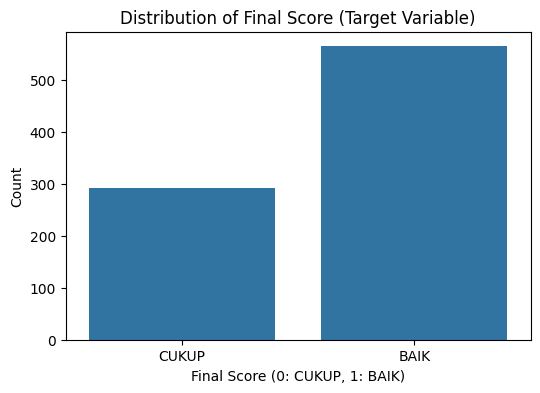

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='final_score', data=df_normalized)
plt.title('Distribution of Final Score (Target Variable)')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show() #distribusi fitur target

### SMOTE

In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Distribusi kelas sebelum SMOTE train-set
print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))

# Distribusi kelas setelah SMOTE pada train-set
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Original dataset shape Counter({1: 451, 0: 233})
Resampled dataset shape Counter({1: 451, 0: 451})
Shape of X_train_resampled: (902, 89)
Shape of y_train_resampled: (902,)
Shape of X_test: (172, 89)
Shape of y_test: (172,)


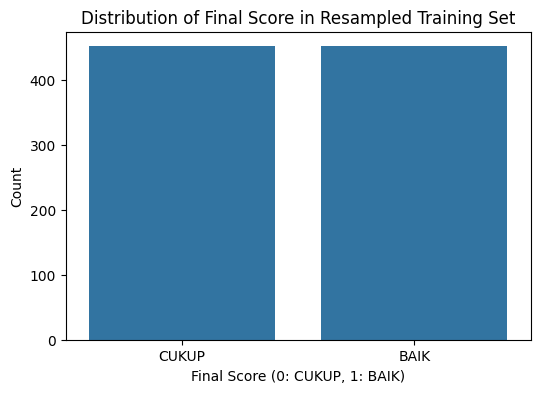

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Final Score in Resampled Training Set')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show()

# **4. Modeling**

### Inisialisasi

In [13]:
# Definisikan model MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer untuk binary classification
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# prompt: definisikan model deep learning sederhana lain yang cocok digunakan untuk kasus klasifikasi

# Definisikan model Deep Learning sederhana
model_simple = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer untuk binary classification
])

# Kompilasi model
model_simple.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Ringkasan model
model_simple.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,425 (13.38 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [15]:
# prompt: train model mlp dengan callback

# Definisikan callback Early Stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Pantau validation loss
    patience=10,          # Jumlah epoch tanpa peningkatan sebelum berhenti
    restore_best_weights=True # Kembalikan bobot terbaik dari epoch terbaik
)

# Latih model dengan data yang telah di-SMOTE dan tambahkan callback
history = model_simple.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=100,          # Jumlah epoch maksimum
    batch_size=32,
    validation_split=0.2, # Gunakan 20% dari data latih untuk validasi
    callbacks=[early_stopping_callback] # Tambahkan callback
)

# Evaluasi model pada data uji
loss, accuracy = model_simple.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6403 - loss: 0.6228 - val_accuracy: 0.0497 - val_loss: 0.9546
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6670 - loss: 0.5790 - val_accuracy: 0.0829 - val_loss: 0.9222
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6581 - loss: 0.5722 - val_accuracy: 0.0884 - val_loss: 0.9508
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6952 - loss: 0.5165 - val_accuracy: 0.3812 - val_loss: 0.7487
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7606 - loss: 0.4914 - val_accuracy: 0.4972 - val_loss: 0.7152
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7786 - loss: 0.4611 - val_accuracy: 0.6575 - val_loss: 0.6295
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 0.4224 - val_accuracy: 0.5801 - val_loss: 0.6759
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8298 - loss: 0.4093 - val_accuracy: 0.5635 - 

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5250 - loss: 0.6825 - val_accuracy: 0.6277 - val_loss: 0.6373
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6906 - loss: 0.5990 - val_accuracy: 0.6277 - val_loss: 0.6165
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6688 - loss: 0.5782 - val_accuracy: 0.6277 - val_loss: 0.5774
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6764 - loss: 0.5341 - val_accuracy: 0.6715 - val_loss: 0.5228
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.4938 - val_accuracy: 0.6861 - val_loss: 0.4959
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7784 - loss: 0.4468 - val_accuracy: 0.8029 - val_loss: 0.4204
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.3864 - val_accuracy: 0.8540 - val_loss: 0.3870
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - loss: 0.3610 - val_accuracy: 0.8321 - val_loss

### Predict

In [17]:
loss, accuracy = model_simple.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8283 - loss: 0.3925 


In [18]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7751 - loss: 0.7065 


# **5. Model Evaluation**
MLP accuracy score at 0.8

### Accuracy

In [19]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.6790010929107666
Test Accuracy: 0.7848837375640869
